#### Question 1 with SA

In [8]:
# hyperparameters:
NO_UPDATE_TIMES = 10e4 #10e4

# Define iteration numbers
n = 2 #2

# Set temperature reduction factor
c = 0.5

import numpy as np

def f(x):
    return -(x**5)+5*(x**3)+20*x-5

def get_random(low, high, unit):
    return np.random.uniform(low, high, unit)

selected_4pts = [-2, 0, 1, 3]
rand_4pts = []
for i in range(len(selected_4pts)):
    rand_4pts.append(f(selected_4pts[i]))
init_temp = np.mean(rand_4pts)

# set initial design point
x = 0
SA = []

## Some Initializations
no_update_times = 0
des_x = x
temp = init_temp
print(f'init_temp = {init_temp}')
iters_sum = 0
while(no_update_times<=NO_UPDATE_TIMES):

    iter = 0

    while((iter<=n)&(no_update_times<=NO_UPDATE_TIMES)):
        # Compute current_state
        current_state = f(des_x)

        # randomly select an uniformly distributed r.v.
        u = get_random(0, 1, 1)

        # set ranges as +- 6
        r = des_x+u*12-6
        while(np.abs(r)>4):
            #print(f'r={r}>4')
            u = get_random(0, 1, 1)
            r = des_x+u*12-6
        attempt_state = f(r)

        # Step 3 and Step 4
        del_f = attempt_state - current_state

        if del_f>0:
            #print(f'del_f:{del_f}')
            c = get_random(0, 1, 1)
            Prob_of_X_2 = np.exp(-del_f/(1*temp))
            #print(f' r = {r} , $P(X_2)$ = {Prob_of_X_2}')
            if Prob_of_X_2 > c:
                des_x = r
                #print(f'! assign new design (x) = {des_x}')
                SA.append(float(f(des_x)))
                current_state = attempt_state
                temp = c*temp
                no_update_times = 0
        else:
            no_update_times +=1

        iter += 1
        iters_sum += 1


init_temp = -23.0


c:\users\woody\desktop\(wed_234)_computation_of_data_science\homework\venv\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp


#### FE plot

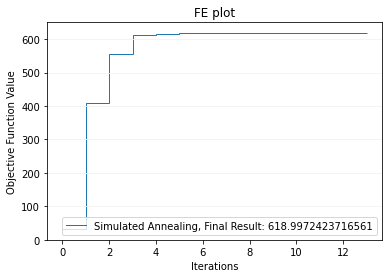

In [9]:
import matplotlib.pyplot as plt
plt.stairs(SA, label=f'Simulated Annealing, Final Result: {SA[-1]}', baseline=None)

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('FE plot')
# plt.xlim()
# plt.ylim()
plt.grid(axis='y', color='0.95')

plt.legend(loc=4)

plt.show()
